In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from typing import Union

import os

import startup_config_preferences

#seaborn set_style persists globally and thus requires a restart kernel in order to revert to default seaborn style
sns.set_style(style = "whitegrid")

# Defining Global Functions and Variables

In [3]:
global_months_list = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'] #used for generating dynamic plot titles (Months listed in order of fiscal year start)
global_font = dict(color = "#032A49") #Changes title color for all final plots
# global_font = dict(color = "midnightblue") #Changes title color for all final plots

def display_in_thousands(x, pos):
    return f"${x/1000:,.0f}"

def display_in_percents(x, pos):
    return f"{x:,.0%}"

def move_legend(ax, handles, labels, ncol):
    '''Moves legend below x-label using bbox_to_anchor.'''
    ax.legend(handles = handles,
                labels = labels,
                loc = "lower center",
                bbox_to_anchor = (0.5, -0.15), 
                ncol = ncol, 
                frameon = False
        )

def get_title_range(df):
    '''Dynamically generating the month-year portion of the title string for plots.'''
    start_month, end_month  = (df[global_months_list].columns[0], 
                               df[global_months_list].dropna(axis = 1).columns[-1]
                               )
    
    start_year, end_year = df[global_months_list].index.str.extract("(\d+)", expand = False).dropna().astype(int).sort_values()[[0, -1]]

    return f"({start_month}{start_year-1} - {end_month}{end_year})"

#Defining functions for determining upper and lower limits of yaxes dynamically
def get_upper_lim(max_val:float, interval:Union[float, int])-> float:
    '''
    Compute the upper limit of the yaxis of a specific plot. 
    Want to guarantee there is space between the top of the plotted data and the graph.

    Keyword arguments:
        max_val -- Maximum Data Value\n
        interval -- Distance between each ylabel value

    Returns:
        New maximum ylabel value
    '''
    pad = 0 
    max_val_unit = max_val/interval

    if (np.ceil(max_val_unit)-(max_val_unit))/(max_val_unit) < 0.05:
        pad = interval
    
    return np.ceil((max_val+pad)/interval)*interval

def get_lower_lim(min_val, interval):
    '''
    Compute the lower limit of the yaxis of a specific plot. 

    Keyword arguments:
        min_val -- Minimum Data Value\n
        interval -- Distance between each ylabel value

    Returns:
        New minimum ylabel value
    '''
    return np.floor(min_val/interval)*interval

# Loading and Cleaning Datasets

In [5]:
df_gross_margin = pd.read_csv("data/df_gross_margin_public.csv", index_col=0)
df_gross_margin

,Oct_31_2020,Nov_30_2020,Dec_31_2020,Jan_31_2021,Feb_28_2021,Mar_31_2021,Apr_30_2021,May_31_2021,Jun_30_2021,Jul_31_2021,Aug_31_2021,Sep_30_2021,Oct_31_2021,Nov_30_2021,Dec_31_2021,Jan_31_2022,Feb_28_2022,Mar_31_2022,Apr_30_2022,May_31_2022,Jun_30_2022,Jul_31_2022,Aug_31_2022,Sep_30_2022,Oct_31_2022,Nov_30_2022,Dec_31_2022,Jan_31_2023,Feb_28_2023,Mar_31_2023,Apr_30_2023,May_31_2023,Jun_30_2023,Jul_31_2023
Sales,"1,861,079.06","2,410,597.68","1,559,478.82","1,559,679.68","2,612,043.30","1,239,163.82","2,305,639.07","2,489,995.95","3,829,732.59","2,548,014.87","1,485,843.41","3,906,721.79","3,998,822.03","5,420,148.02","3,683,224.08","4,427,566.66","1,692,786.17","4,740,614.28","3,605,704.72","3,315,233.10","2,967,412.66","3,047,286.43","2,805,755.26","4,491,629.66","3,159,662.58","3,514,025.97","2,374,111.24","1,446,238.28","1,306,363.28","2,883,401.39","3,225,472.46","2,658,515.73","3,484,511.88","1,689,425.78"
Gross Margin,0.24,0.21,0.23,0.14,0.15,0.19,0.13,0.21,0.22,0.14,0.19,0.17,0.17,0.15,0.15,0.14,0.25,0.11,0.16,0.19,0.16,0.09,0.15,0.18,0.19,0.18,0.22,0.11,0.23,0.32,0.27,0.28,0.21,0.30
EBITDA Margin (Unadjusted),0.10,0.05,0.02,-0.07,0.04,-0.01,0.02,0.10,0.13,0.02,-0.03,0.07,0.08,0.08,0.05,0.04,0.04,0.02,0.05,0.02,0.01,-0.02,0.03,0.07,0.10,0.06,0.08,-0.14,-0.01,0.18,0.11,0.10,0.09,0.11
EBITDA Margin,0.10,0.05,0.02,-0.07,0.04,-0.01,0.02,0.10,0.13,0.02,-0.03,0.07,0.08,0.08,0.05,0.04,0.04,0.02,0.05,0.02,0.01,-0.02,0.03,0.07,0.10,0.06,0.08,-0.14,-0.01,0.18,0.11,0.10,0.09,0.11


In [6]:
xlabel_gross_margin = pd.to_datetime(df_gross_margin.columns.str.replace("_", " ")).strftime("%b-%y")

# Plot: Monthly Sales, Unadjusted Gross Margin, and EBITDA Margin

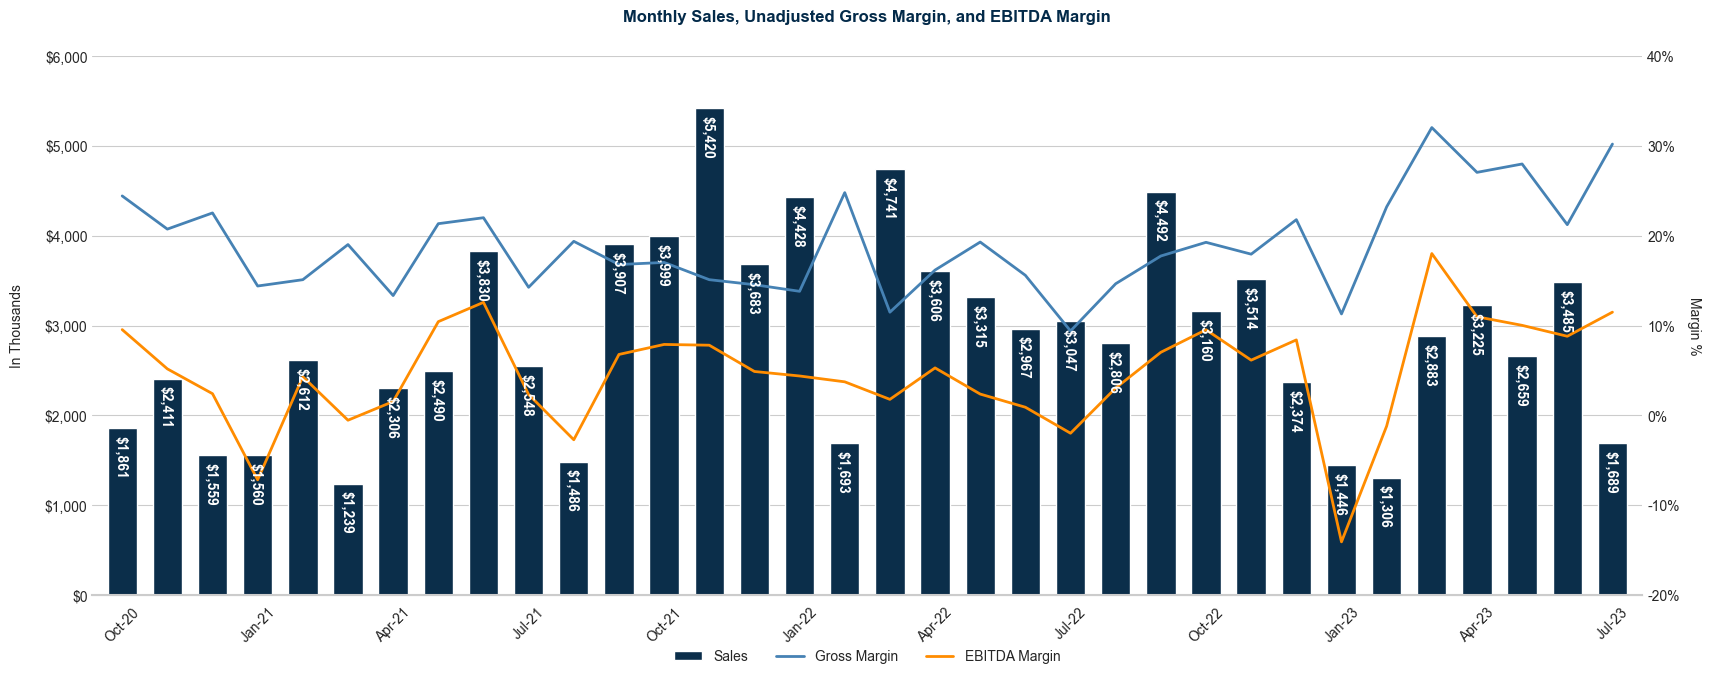

In [8]:
def transform_y1_to_y2(y1:float, lower_lims: list[float], upper_lims: list[float]) -> float:
    '''
    Transforms a y value from axis 1 to a y value from axis 2

    Formula: (y1-min1)/(max1 - min1) = (y2-min2)/(max2 - min2) 

    Parameters:
        y1: single value used by first axis
        \n
        lower_lims: lower limits accross both y axes
            e.g.: [min_val of ax1 , min_val of ax2]
        \n
        upper_lims: upper limits accross both y axes
            e.g.: [max_val of ax1, max_val of ax2]

    Returns:
        transformed value that resides in the same location, but on the scale of axis 2
    '''

    range_ax1 = upper_lims[0] - lower_lims[0]
    range_ax2 = upper_lims[1] - lower_lims[1]
    return range_ax2*((y1-lower_lims[0])/range_ax1) + lower_lims[1]

df_barplot = df_gross_margin.T[["Sales"]].reset_index(names = "Month") #Storing dataframe to use for barplot
df_lineplot = df_gross_margin.T[["Gross Margin", "EBITDA Margin"]] #Storing dataframe to use for lineplot

ax1_interval, ax2_interval = 7.5e5, 0.1 #y1, y2 axis display intervals
lower_lims = [0, get_lower_lim(df_lineplot.values.min(), ax2_interval)] #generating and storing lower limits for yaxes
upper_lims = [get_upper_lim(df_barplot.Sales.max(), ax1_interval), get_upper_lim(df_lineplot.values.max(), ax2_interval)] #generating and storing upper limits for yaxes

plt.figure(figsize = (20,7))

#Generating seaborn barplot on ax1
ax1 = sns.barplot(df_barplot,
                    x = "Month",
                    y = "Sales",
                    color = "#003054",
                    width = 0.65,
                    label = "Sales",
                    legend = False
                )

#barplot formatting adjustments below
ax1.set_xticks(df_gross_margin.T.index[0::3])
ax1.set_xticklabels(xlabel_gross_margin[0::3], rotation = 45)
ax1.set_xlabel("")
ax1.set_ylabel("In Thousands", labelpad = 15)
ax1.spines["bottom"].set_linewidth(1.5)
ax1.set_title("Monthly Sales, Unadjusted Gross Margin, and EBITDA Margin",
          weight = "bold",
          fontsize = 12,
          pad = 25,
          fontdict = global_font
        )
ax2 = ax1.twinx() #defining ax2 and having it share an xaxis with ax1

#Generating seaborn lineplot on ax2
sns.lineplot(df_lineplot,
                dashes = False,
                ax = ax2,
                sort = False,
                palette = ["steelblue", "darkorange"],
                linewidth = 2
            )

#Determining ax2 yaxis positions for bar label annotations
annote_y = df_gross_margin.T.Sales.apply(transform_y1_to_y2, 
                                         lower_lims = lower_lims, 
                                         upper_lims = upper_lims
                                        )

#Note: annotations must be plotted after lineplot or use zorder input to prevent lineplots overlapping annotations
#Creating bar label annotations as well as formatting them properly
for x,(y,y_sales) in enumerate(zip(annote_y, df_gross_margin.T.Sales)):
    ax2.annotate(f"${y_sales/1000:,.0f}", 
                    xy = (x,y),
                    xytext = (-1,-5),
                    textcoords = "offset points",
                    rotation = -90,
                    ha = "center",
                    va = "top", 
                    color = "white", 
                    fontweight = "bold"
                )

#Storing ax1 and ax2 legend handles and labels to combine them
(handles, labels), (handles2, labels2) = ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()

#calling function to move legend to correct position and passing in handles and labels
move_legend(ax2, handles + handles2, labels + labels2, df_gross_margin.shape[0])

ax2.set_ylabel("Margin %", rotation = -90, labelpad = 15)
ax2.grid(False)

#Generating for loop to apply formatting changes that both ax1, ax2 require (ylims, hiding tick marks, adjusting margins, formatting yaxis, etc.)
ax_list = [ax1, ax2]
format_list = [display_in_thousands, display_in_percents]

#Below is a loop to aggregate all the common graph settings accross both ax1 and ax2 into one block of code
for ax, display_func, lower_lim, upper_lim in zip(ax_list, format_list, lower_lims, upper_lims):
    ax.set_ylim(lower_lim, upper_lim)
    ax.tick_params(axis = "y", length = 0)
    ax.margins(x = 0.01)
    ax.yaxis.set_major_formatter(display_func)
    sns.despine(left = True, ax = ax)

In [30]:
df_barplot

,Month,Sales
0,Oct_31_2020,"1,861,079.06"
1,Nov_30_2020,"2,410,597.68"
2,Dec_31_2020,"1,559,478.82"
3,Jan_31_2021,"1,559,679.68"
4,Feb_28_2021,"2,612,043.30"
...,...,...
29,Mar_31_2023,"2,883,401.39"
30,Apr_30_2023,"3,225,472.46"
31,May_31_2023,"2,658,515.73"
32,Jun_30_2023,"3,484,511.88"


In [31]:
df_lineplot

,Gross Margin,EBITDA Margin
Oct_31_2020,0.24,0.10
Nov_30_2020,0.21,0.05
Dec_31_2020,0.23,0.02
Jan_31_2021,0.14,-0.07
Feb_28_2021,0.15,0.04
...,...,...
Mar_31_2023,0.32,0.18
Apr_30_2023,0.27,0.11
May_31_2023,0.28,0.10
Jun_30_2023,0.21,0.09


In [32]:
scale

NameError: name 'scale' is not defined